# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [169]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [171]:
#your code here
spaceship.shape

(8693, 14)

**Check for data types**

In [172]:
#your code here
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [173]:
#your code here
spaceship.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [174]:
#your code here
spaceship = spaceship.dropna()
spaceship

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [175]:
#your code here

# Define a function that extracts the first letter
def first_letter(text):
    return text[0] if len(text) > 0 else ''

# Apply the function to the 'names' column
spaceship['Cabin'] = spaceship['Cabin'].apply(first_letter)
spaceship['Cabin'].value_counts()

Cabin
F    2152
G    1973
E     683
B     628
C     587
D     374
A     207
T       2
Name: count, dtype: int64

- Drop PassengerId and Name

In [176]:
#your code here
spaceship.head()
spaceship = spaceship.drop(columns=['PassengerId', 'Name'])


- For non-numerical columns, do dummies.

In [177]:
#your code here
non_numerical_cols = spaceship.select_dtypes(include=['object']).columns
spaceship_dummies = pd.get_dummies(spaceship, columns=non_numerical_cols)

spaceship_dummies.head()

# Assuming 'Transported' is the target variable
target = spaceship_dummies['Transported']
features = spaceship_dummies.drop(columns=['Transported'])


**Perform Train Test Split**

In [178]:
#your code here
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)


In [179]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
normalizer = MinMaxScaler()
normalizer.fit(X_train)
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)
X_train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
3432,32.0,0.0,0.0,0.0,0.0,0.0,False,False,True,False,...,False,True,False,False,False,False,False,True,True,False
7312,4.0,0.0,0.0,0.0,0.0,0.0,True,False,False,False,...,False,False,False,True,False,False,False,True,True,False
2042,30.0,0.0,236.0,0.0,1149.0,0.0,True,False,False,True,...,False,False,True,False,False,False,False,True,True,False
4999,17.0,13.0,0.0,565.0,367.0,1.0,False,False,True,True,...,False,True,False,False,False,False,False,True,True,False
5755,26.0,0.0,0.0,0.0,0.0,0.0,True,False,False,False,...,False,False,False,True,False,False,False,True,True,False


In [180]:
X_train_norm
X_train_norm = pd.DataFrame(X_train_norm, columns=X_train.columns, index=X_train.index )
X_train_norm.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
3432,0.405063,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7312,0.050633,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2042,0.379747,0.00000,0.007916,0.000000,0.051276,0.000000,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4999,0.215190,0.00131,0.000000,0.046111,0.016378,0.000049,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5755,0.329114,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [181]:
X_test_norm = pd.DataFrame(X_test_norm, columns=X_test.columns, index=X_test.index)
X_test_norm.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
2453,0.632911,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1334,0.227848,0.0,0.000000,0.0,0.00000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
8272,0.189873,0.0,0.000000,0.0,0.00000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
5090,0.658228,0.0,0.000000,0.0,0.00000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4357,0.784810,0.0,0.054775,0.0,0.07774,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

In [182]:
#your code here
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_norm, y_train)


KNeighborsClassifier(n_neighbors=3)

- Evaluate your model's performance. Comment it

In [183]:
#your code here
print(f"The R2 of the model on the TEST set is: {knn.score(X_test_norm, y_test): .2f}")

The R2 of the model on the TEST set is:  0.75


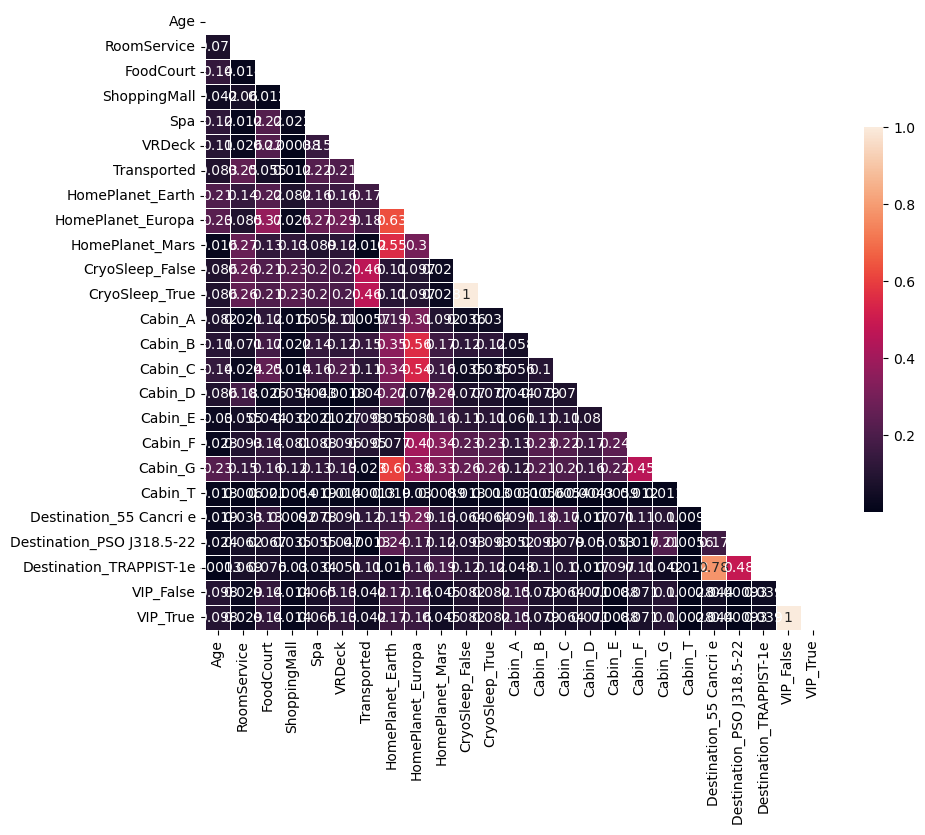

In [184]:
corr=np.abs(spaceship_dummies.corr()) # corr(x,y) = corr(y, x), corr(x,x) = 1

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [185]:


X_train_reduced = X_train_norm.drop(columns = ["Destination_TRAPPIST-1e"])
X_test_reduced = X_test_norm.drop(columns = ["Destination_TRAPPIST-1e"])

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_reduced, y_train)

print(f"The value of R2 on the TEST set is: {knn.score(X_test_reduced, y_test): .2f}")




The value of R2 on the TEST set is:  0.76


In [186]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled_np = scaler.transform(X_train)
X_test_scaled_np  = scaler.transform(X_test)

X_train_standarized = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)
X_test_standarized  = pd.DataFrame(X_test_scaled_np, columns=X_test.columns, index=X_test.index)

knn.fit(X_train_standarized, y_train)

knn.predict(X_train_standarized)
knn.predict(X_test_standarized)

array([ True,  True,  True, ...,  True,  True,  True])

In [187]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.5477


In [188]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       False       0.53      0.89      0.66       661
        True       0.66      0.20      0.31       661

    accuracy                           0.55      1322
   macro avg       0.59      0.55      0.49      1322
weighted avg       0.59      0.55      0.49      1322



In [189]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)
print(f"The new R2 is {knn.score(X_test_standarized, y_test): .2f}")


Confusion Matrix:
[[591  70]
 [528 133]]
The new R2 is  0.77
